In [3]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.model_selection import cross_val_score


In [4]:
 # Set the file path
file_path = Path("Merged_Data/clean_data_model1.csv")

# Read the csv file into a pandas DataFrame
horse_df = pd.read_csv(file_path)

# Review the DataFrame
horse_df.head(100)

,rid,winningTime,metric,ncond,class,age,decimalPrice,isFav,position,positionL,distance,outHandicap,RPR,saddle,TR,OR,runners,weight,res_win
0,10312,253.88,3218.0,10,4,4,0.076923,0.0,1,4.57028,2.0,2.541359,103.0,9.0,103.0,74.677073,9.0,66.0,1.0
1,10312,253.88,3218.0,10,4,6,0.444444,1.0,2,15.00000,2.0,2.541359,96.0,7.0,89.0,110.000000,9.0,65.0,0.0
2,10312,253.88,3218.0,10,4,7,0.019608,0.0,3,5.50000,2.0,2.541359,97.0,5.0,88.0,74.677073,9.0,72.0,0.0
3,10312,253.88,3218.0,10,4,6,0.230769,0.0,4,10.00000,2.0,2.541359,89.0,4.0,75.0,74.677073,9.0,72.0,0.0
4,10312,253.88,3218.0,10,4,7,0.038462,0.0,5,5.50000,2.0,2.541359,82.0,6.0,67.0,74.677073,9.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,113831,62.47,1105.5,8,0,5,0.322581,1.0,1,4.57028,NaN,2.541359,109.0,4.0,NaN,74.677073,10.0,54.0,1.0
96,113831,62.47,1105.5,8,0,6,0.060976,0.0,2,0.75000,NaN,2.541359,107.0,2.0,NaN,74.677073,10.0,54.0,0.0
97,113831,62.47,1105.5,8,0,6,0.034483,0.0,3,NaN,NaN,2.541359,106.0,11.0,NaN,74.677073,10.0,54.0,0.0
98,113831,62.47,1105.5,8,0,5,0.114943,0.0,4,0.50000,NaN,2.541359,107.0,9.0,NaN,74.677073,10.0,55.0,0.0


In [5]:
# #Cleaning the data
# #drop title and headgear columns
horse_df = horse_df.drop(["positionL","position","distance","TR","saddle", "winningTime", "rid"], axis = 1)
horse_df.head()

,metric,ncond,class,age,decimalPrice,isFav,outHandicap,RPR,OR,runners,weight,res_win
0,3218.0,10,4,4,0.076923,0.0,2.541359,103.0,74.677073,9.0,66.0,1.0
1,3218.0,10,4,6,0.444444,1.0,2.541359,96.0,110.000000,9.0,65.0,0.0
2,3218.0,10,4,7,0.019608,0.0,2.541359,97.0,74.677073,9.0,72.0,0.0
3,3218.0,10,4,6,0.230769,0.0,2.541359,89.0,74.677073,9.0,72.0,0.0
4,3218.0,10,4,7,0.038462,0.0,2.541359,82.0,74.677073,9.0,72.0,0.0


In [6]:
# Check for missing values
print(horse_df.isnull().sum())

# Check summary statistics
print(horse_df.describe())


metric          0
ncond           0
class           0
age             0
decimalPrice    0
isFav           0
outHandicap     0
RPR             0
OR              0
runners         0
weight          0
res_win         0
dtype: int64
              metric          ncond          class            age  \
count  149513.000000  149513.000000  149513.000000  149513.000000   
mean     2225.120682       4.725790       1.954646       4.707557   
std      1132.108871       4.229083       2.348812       2.063987   
min       804.000000       0.000000       0.000000       2.000000   
25%      1407.000000       1.000000       0.000000       3.000000   
50%      1709.500000       5.000000       0.000000       4.000000   
75%      3218.000000       8.000000       4.000000       6.000000   
max      6838.000000      19.000000       7.000000      27.000000   

        decimalPrice          isFav    outHandicap            RPR  \
count  149513.000000  149513.000000  149513.000000  149513.000000   
mean       

In [7]:
# Split target column from dataset
y = horse_df['res_win']
X = horse_df.drop(columns='res_win')

In [8]:
y[:5]

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: res_win, dtype: float64

In [9]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
 # Creating StandardScaler instance
scaler = StandardScaler()


In [11]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [12]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Creating the decision tree classifier instance
model = DecisionTreeClassifier(random_state=78)

In [14]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [26]:
 # Creating the decision tree classifier instance
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=78
)


In [27]:
 # Fitting the model
model = model.fit(X_train_scaled, y_train)

In [28]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores:
[0.90355375 0.90333081 0.90297409 0.90288492 0.90346027]
Mean CV Score: 0.9032407674701861


In [29]:
 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,33672,65
Actual 1,3501,141


Accuracy Score: 0.9045988389202494
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     33737
         1.0       0.68      0.04      0.07      3642

    accuracy                           0.90     37379
   macro avg       0.80      0.52      0.51     37379
weighted avg       0.88      0.90      0.86     37379



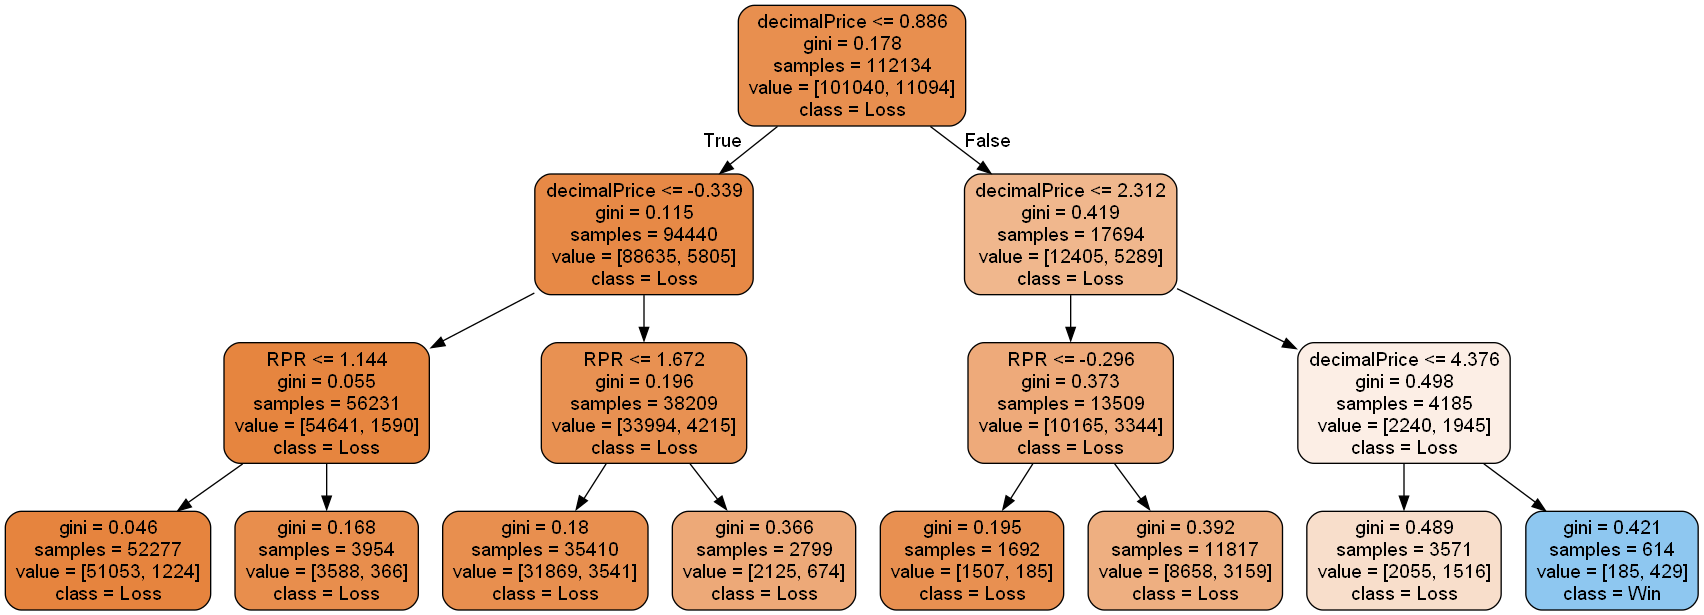

In [31]:
# Visualize the decision tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=["Loss", "Win"],
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree_small_sample', view=False)

# Display the decision tree
Image(filename='decision_tree_small_sample.png')